**Classification Methods for Fake News**

*Silina Polina, Yen Thi Nguyen, Voronkov Ilia*

**0. Connect to disk and import libraries.**

In [ ]:
# Connectable to disk
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AH0RYLGfCcb6XW-APfHZXhr5SdgBMUNarzjkaKcS8g2-uppQWUgazU
Mounted at /content/gdrive


In [ ]:
!pip install pyvi

     |████████████████████████████████| 8.5MB 3.6MB/s 
     |████████████████████████████████| 747kB 58.0MB/s 


In [ ]:
!pip install annoy
from gensim.similarities.index import AnnoyIndexer

     |████████████████████████████████| 645kB 4.6MB/s 
  Created wheel for annoy: filename=annoy-1.16.3-cp36-cp36m-linux_x86_64.whl size=297335 sha256=59023d67f6d7cc807280e1e3fe418463ae7aa5ad2ad5eaba1b8dcc8fa864e828
  Stored in directory: /root/.cache/pip/wheels/f3/01/54/6ef760fe9f9fc6ba8c19cebbe6358212b5f3b5b0195c0b813f
Successfully built annoy


In [ ]:
import os
import pickle
import random
from collections import Counter

import numpy as np
from tqdm import tqdm_notebook
from sklearn.model_selection import KFold
import gensim
import torch
from torchtext import data
from torch import nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from pyvi import ViTokenizer
import re, os, string
import pandas as pd
from gensim.models import Word2Vec, FastText
from gensim.models import KeyedVectors
import numpy as np
import unicodedata as ud
import random
import csv
import time
from tqdm import tqdm
from gensim import utils
from gensim.models.doc2vec import LabeledSentence, TaggedDocument
from gensim.models import Doc2Vec

In [ ]:
from sklearn.svm import LinearSVC
from gensim import corpora, matutils
from sklearn.metrics import roc_curve, f1_score, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import nltk
from collections import defaultdict
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


**1. Read data.**

In [ ]:
data_path = 'gdrive/My Drive/NewsProject/Data/PreparedData/PreparedData_Version_00/step2.csv'
##file_stopwords = 'Dictionaries/Stopwords_vi.txt'
##d2v_model_path = 'em_model/doc2vec_model.vec'
em_path = 'gdrive/My Drive/NewsProject/Data/ModelsData/'
##vocab_path = '/content/drive/My Drive/LuanVan/model/vocab.txt'
w2v_path_pre_trained = 'gdrive/My Drive/NewsProject/Tokenizer/news_upos_skipgram_300_5_2019.bin'
##w2v_model_path = '/content/drive/My Drive/LuanVan/model/word2vec_skipgram.model'
image_path = 'gdrive/My Drive/NewsProject/Data/ModelsData/'

In [ ]:
##csv_226 = 'pre_data/preproc_vn_news_226_tlfr.csv' 
##csv_223 = 'pre_data/preproc_vn_news_223_tdlfr.csv' 
##csv_376 = 'pre_data/preproc_vn_news_376.csv'

In [ ]:
def DataReader(data_path):
  train_data = pd.read_csv(data_path, sep=";", header=[0], encoding='Cp1251')
  texts = train_data['Text']
  labels = train_data['Value'].values
  return texts.values, labels

texts, labels = DataReader(data_path)
texts

array(['в интернете появилась информация о продаже данных  тысяч вкладчиков втб пишет в понедельник газета известия по данным газеты сообщение о продаже базы данных вкладчиков втб появилось на специализированном форуме вечером  ноября актуальность информации там датируется  годом в базе содержится  тыс строк  тыс из которых можно купить непосредственно у самого продавца по  рублей за строчку  тыс строк  через него по  рублей за строчку во фрагменте базы данных имеющемся в распоряжении известий содержится персональная информация о вкладчиках фио домашний адрес индекс номер телефона и сумма вклада в нескольких строчках также электронная почта клиента втб заявил что провел расследование в связи с появлением этой информации было выяснено что эти сведения были актуальны по состоянию на  год банк связался со всеми клиентами чья личная информация могла быть скомпрометирована предупредил о случившемся и принес свои извинения их информационной безопасности ничего не угрожает обращаем внимание ч

In [ ]:
##def DataReader(data_path, csv_path):
##    with open(os.path.join(data_path, csv_path), 'r') as csv_file:
##      train = pd.read_csv(csv_file) 
##      texts = train['text'] + train['title']  #for csv_376
##    #texts = train['text']#for csv226
##      labels = train['label'].values
##    return texts.values, labels
##texts, labels = DataReader(data_path, csv_376)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
encoded_label = labelEncoder.fit_transform(labels)
labels = np.reshape(encoded_label,(-1,1))
labels

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

**2. Tokenizer.**

In [ ]:
from collections import defaultdict
from os.path import abspath
def my_tokenizer(texts):
    docs = []
    for text in texts:
      tokens = str(text).split() # data does not contain extraneous characters
      docs.append(tokens)
    return docs

token_texts = my_tokenizer(texts)

In [ ]:
word_index = sorted(list({word for sentence in token_texts for word in sentence}))
print(len(word_index))
len_sen = []
i=0
for sentence in token_texts:
    i +=1
    len_sen.append(len(sentence))
print(i)

99833
5591


In [ ]:
max_features = len(word_index) + 2
max_len = max(len_sen)

print(max_features)
print(max_len)

99835
2903


In [ ]:
#train word2vec
#model = Word2Vec(token_texts, size=256, window=10, min_count=2, workers=4, sg=0)
#model.wv.save(os.path.join(em_path,'word2vec_skipgram.model'))
#################
'''
model_fasttext = FastText(size=256, window=10, min_count=2, workers=4, sg=1)
model_fasttext.build_vocab(token_texts)
model_fasttext.train(texts, total_examples=model_fasttext.corpus_count, epochs=model_fasttext.iter)
model_fasttext.wv.save(os.path.join(em_path,'fasttext_gensim.model'))
'''

"\nmodel_fasttext = FastText(size=256, window=10, min_count=2, workers=4, sg=1)\nmodel_fasttext.build_vocab(token_texts)\nmodel_fasttext.train(texts, total_examples=model_fasttext.corpus_count, epochs=model_fasttext.iter)\nmodel_fasttext.wv.save(os.path.join(em_path,'fasttext_gensim.model'))\n"

**Word2vec**

In [ ]:
def make_embedding(texts, embedding_path, max_features = 12000):
    embedding_path = abspath(embedding_path)

    def get_coefs(word, *arr):
        return word, np.asarray(arr, dtype='float32')

    if embedding_path.endswith('.vec'):
        embedding_index = dict(get_coefs(*o.strip().split(" "))
                               for o in open(embedding_path))
        mean_embedding = np.mean(np.array(list(embedding_index.values())))
    elif embedding_path.endswith('bin'):
        embedding_index = KeyedVectors.load_word2vec_format(
            embedding_path, binary=True)
        mean_embedding = np.mean(embedding_index.vectors, axis=0)
    embed_size = mean_embedding.shape[0]
    word_index = sorted(list({word for sentence in texts for word in sentence}))
    nb_words = min(max_features, len(word_index))
    embedding_matrix = np.zeros((nb_words + 1, embed_size))
    i = 1
    word_map = defaultdict(lambda: nb_words)
    for word in word_index:
        if i >= max_features:
            continue
        if word in embedding_index:
            embedding_matrix[i] = embedding_index[word]
        else:
            embedding_matrix[i] = mean_embedding
        word_map[word] = i
        i += 1
    
    embedding_matrix[-1] = mean_embedding
    return embed_size, word_map, embedding_matrix
# word_map - word vocubary
DEFAULT_MAX_LENGTH = max(len_sen)
def text_to_sequences(texts, word_map, max_len=DEFAULT_MAX_LENGTH):
    texts_id = []
    for sentence in texts:
        sentence = [word_map[word.lower()] for word in sentence][:max_len]
        padded_setence = np.pad(
            sentence, (0, max(0, max_len - len(sentence))), 'constant', constant_values=0)
        texts_id.append(padded_setence)
    return np.array(texts_id)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(token_texts,labels, test_size=0.3)#text has tokenized
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size=0.6)#shuffle

In [ ]:
'''embed_size, word_map, embedding_mat = make_embedding(
    list(texts),
    embedding_path=os.path.join(data_path, w2v_path_pre_trained),
    max_features=15000
)
'''

'embed_size, word_map, embedding_mat = make_embedding(\n    list(texts),\n    embedding_path=os.path.join(data_path, w2v_path_pre_trained),\n    max_features=15000\n)\n'

In [ ]:
# Keras
from keras.utils import to_categorical, plot_model
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers.embeddings import Embedding
from keras.layers import Dense,Input, Flatten, LSTM, Conv1D, MaxPooling1D,\
                          MaxPool1D,Dropout,Concatenate, Activation, BatchNormalization,Bidirectional, TimeDistributed

from keras.models import Model, Sequential, model_from_json, load_model
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard, Callback, CSVLogger
from keras import backend as K
import tensorflow as tf

In [ ]:
def find_threshold(pred_proba, y_true, metric = f1_score):
    cur_acc = 0
    cur_thres = 0
    for ind in range(len(pred_proba) - 1):
        threshold = (pred_proba[ind][0] + pred_proba[ind + 1][0]) / 2
        pred = (pred_proba > threshold).astype(np.int8)
        acc = metric(pred, y_true)
        if acc > cur_acc:
            cur_thres = threshold
            cur_acc = acc

    return cur_thres
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.
        Only computes a batch-wise average of recall.
        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.
        Only computes a batch-wise average of precision.
        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


BUILD MODEL

In [ ]:
def TextCNN(embeddingMatrix, embed_size = 300, max_features = 12000, maxlen = 5000, filter_sizes = {2, 3, 4, 5}, trainable = True):
        inp = Input(shape = (maxlen, ))
        print("start_embeding")
        x = Embedding(input_dim = embeddingMatrix.shape[0], output_dim = embed_size, weights = [embeddingMatrix], trainable = trainable)(inp)
        #
        print("end_embeding")
        conv_ops = []
        for filter_size in filter_sizes:
            conv = Conv1D(128, filter_size, activation = 'relu')(x)
            pool = MaxPool1D(5)(conv)
            conv_ops.append(pool)

        concat = Concatenate(axis = 1)(conv_ops)
        # concat = Dropout(0.1)(concat)
        concat = BatchNormalization()(concat)


        conv_2 = Conv1D(128, 5, activation = 'relu')(concat)
        conv_2 = MaxPool1D(5)(conv_2)
        conv_2 = BatchNormalization()(conv_2)
        # conv_2 = Dropout(0.1)(conv_2)

        conv_3 = Conv1D(128, 5, activation = 'relu')(conv_2)
        conv_3 = MaxPool1D(5)(conv_3)
        conv_3 = BatchNormalization()(conv_3)
        # conv_3 = Dropout(0.1)(conv_3)


        flat = Flatten()(conv_3)

        op = Dense(64, activation = "relu")(flat)
        # op = Dropout(0.5)(op)
        op = BatchNormalization()(op)
        out = Dense(1, activation = "sigmoid")(op)
        model = Model(inputs = inp, outputs = out)
        model.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy', f1])#'binary_crossentropy'
        return model
            #adam_optimizer= Adam(learning_rate=0.05)
        #loss_bi_crossentropy  = BinaryCrossentropy(reduction=tf.keras.losses.Reduction.SUM)
        
        

In [ ]:
def myLSTM(embeddingMatrix, embed_size = 300, max_features = 12000, maxlen = 5000, trainable = True):
    inp = Input(shape = (maxlen, ))
    x = Embedding(input_dim = max_features, output_dim = embed_size, weights = [embeddingMatrix])(inp)
    x = LSTM(300)(x)# embedding_mat.shape[0]
    out = Dense(1, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = out)
    model.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy', f1])#'binary_crossentropy'
    return model

In [ ]:
def Bi_LSTM(embeddingMatrix, embed_size = 300, max_features = 12000, maxlen = 5000, trainable = True):
  inp = Input(shape=(max_len,))
  emb = Embedding(output_dim=300, input_dim=embedding_mat.shape[0], 
                         weights=[embeddingMatrix], trainable=False)(inp)
  x = Bidirectional(LSTM(300))(emb)
  x = Dropout(0.5)(x)
  out = Dense(1, activation='sigmoid')(x)
  model = Model(inputs = inp, outputs = out)
  model.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy', f1])#'binary_crossentropy'
  return model

In [ ]:
import os

In [ ]:
embedding_path = os.path.join(data_path, w2v_path_pre_trained)
tokenized_texts = my_tokenizer(texts) #funtion my_tokenizer
train_tokenized_texts, test_tokenized_texts, labels_train, labels_test = train_test_split(
    tokenized_texts, labels, test_size = 0.3
)
test_tokenized_texts, val_tokenized_texts, labels_test, labels_val = train_test_split(
    test_tokenized_texts, labels_test, test_size = 0.2
)
should_mix = False
embed_size, word_map, embedding_mat = make_embedding(
    list(token_texts),
    w2v_path_pre_trained
    #embedding_path,
    #max_features
)
print(len(train_tokenized_texts))
print(len(test_tokenized_texts))
print(embedding_mat.shape[0])


In [ ]:
def train_model(model,model_name,texts_id_train, texts_id_test,texts_id_val, should_find_threshold = True):     
      
      checkpoint = ModelCheckpoint(
          filepath='{}_models.hdf5'.format(model_name),
          monitor='val_accuracy', verbose=1,
          mode='max',
          save_best_only=True
      )
      early = EarlyStopping(monitor='val_accuracy', mode='max', patience=5)
      callbacks_list = [checkpoint, early]

      batch_size = 16
      epochs = 50
      seed =16
      plot_model(model, to_file='{}.png'.format(model_name), show_shapes=True, show_layer_names=True)
      #print(model.summary())
      np.random.seed(seed)
      history = model.fit(
          texts_id_train, labels_train,
          validation_data=(texts_id_val, labels_val),
          callbacks=callbacks_list,
          epochs=epochs,
           verbose=2,
          batch_size=batch_size
      )

      model.load_weights('{}_models.hdf5'.format(model_name))

      prediction_prob = model.predict(texts_id_val)
      
      if should_find_threshold:
          OPTIMAL_THRESHOLD = find_threshold(prediction_prob, labels_val)
      else:
          OPTIMAL_THRESHOLD = 0.5

      print('OPTIMAL_THRESHOLD: {}'.format(OPTIMAL_THRESHOLD))
      prediction = (prediction_prob > OPTIMAL_THRESHOLD).astype(np.int8)
      print('F1 validation score: {}'.format(f1_score(prediction, labels_val)))

      with open('{}_f1.txt'.format(model_name), 'w') as fp:
          fp.write('F1-score'+str(f1_score(prediction, labels_val)))

      
      #test_prediction = model.predict(texts_id_test)

  
      model_n = 'model_{}.h5'.format(model_name)
      model_sav = os.path.join(em_path,model_n)
      model.save(model_sav)
      #print(test_prediction)
      return history, model

In [ ]:
texts_id_train = text_to_sequences(train_tokenized_texts, word_map)
texts_id_val = text_to_sequences(val_tokenized_texts, word_map)
texts_id_test = text_to_sequences(test_tokenized_texts, word_map)
texts_id_texts = text_to_sequences(token_texts, word_map)

In [ ]:
#%%time
model_name = 'CNN_20'
model = TextCNN(embeddingMatrix=embedding_mat,
          embed_size=embed_size,
          max_features=embedding_mat.shape[0], 
          maxlen=max_len)

history, model_af = train_model(model, model_name, texts_id_train, texts_id_test, texts_id_val, should_find_threshold = True)

start_embeding
end_embeding
Epoch 1/15

Epoch 00001: val_accuracy improved from -inf to 0.69940, saving model to CNN_20_models.hdf5
245/245 - 903s - loss: 0.6262 - accuracy: 0.6504 - f1: 0.6075 - val_loss: 0.6375 - val_accuracy: 0.6994 - val_f1: 0.6757
Epoch 2/15

Epoch 00002: val_accuracy did not improve from 0.69940
245/245 - 914s - loss: 0.4122 - accuracy: 0.8129 - f1: 0.8079 - val_loss: 0.9985 - val_accuracy: 0.5565 - val_f1: 0.2184
Epoch 3/15

Epoch 00003: val_accuracy improved from 0.69940 to 0.75000, saving model to CNN_20_models.hdf5
245/245 - 914s - loss: 0.1733 - accuracy: 0.9366 - f1: 0.9363 - val_loss: 0.5828 - val_accuracy: 0.7500 - val_f1: 0.7950
Epoch 4/15

Epoch 00004: val_accuracy did not improve from 0.75000
245/245 - 917s - loss: 0.1052 - accuracy: 0.9650 - f1: 0.9639 - val_loss: 1.2842 - val_accuracy: 0.6786 - val_f1: 0.5307
Epoch 5/15

Epoch 00005: val_accuracy did not improve from 0.75000
245/245 - 909s - loss: 0.0723 - accuracy: 0.9732 - f1: 0.9726 - val_loss: 1.

In [ ]:
#For all corpus
scores = model_af.evaluate(texts_id_texts, labels,
                        batch_size=16)
print('Test Loss:', scores[0])
print('Test Accuracy:', scores[1])

350/350 [==============================] - 344s 984ms/step - loss: 0.1658 - accuracy: 0.9485 - f1: 0.5080
Test Loss: 0.16583451628684998
Test Accuracy: 0.9484886527061462


In [ ]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
def plot_score(history, name_img,image_path):
      #accuracy
      fig1 = plt.figure()
      plt.plot(history.history['accuracy'])
      plt.plot(history.history['val_accuracy'])
      plt.title('Model accuracy '+'{}'.format(name_img))
      plt.ylabel('accuracy')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'], loc='upper left')
      fig1.savefig(os.path.join(image_path,'accuracy_{}.png'.format(name_img)))
      plt.show()
      ####loss
      fig2 = plt.figure()
      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.title('Model loss '+'{}'.format(name_img))
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'], loc='upper left')
      fig2.savefig(os.path.join(image_path,'loss_{}.png'.format(name_img)))
      plt.show()

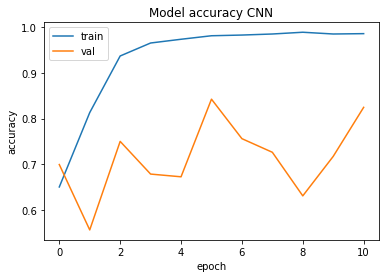

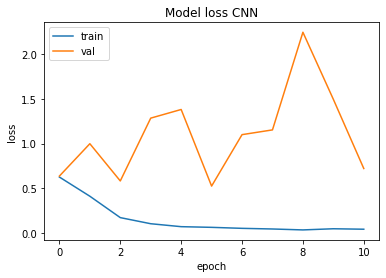

In [ ]:
plot_score(history, 'CNN', image_path)

In [ ]:
%%time
model_name = 'Bi-LSTM'
model_bilstm = Bi_LSTM(embeddingMatrix=embedding_mat,
          embed_size=embed_size,
          max_features=embedding_mat.shape[0], 
          maxlen=max_len,)

history_bilstm,model_bilstm_af = train_model(model_bilstm,model_name,texts_id_train, texts_id_test,texts_id_val, should_find_threshold = True)

Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.49107, saving model to Bi-LSTM_models.hdf5
245/245 - 84s - loss: 0.7059 - accuracy: 0.5083 - f1: 0.5171 - val_loss: 0.6962 - val_accuracy: 0.4911 - val_f1: 0.6517
Epoch 2/50

Epoch 00002: val_accuracy improved from 0.49107 to 0.51190, saving model to Bi-LSTM_models.hdf5
245/245 - 83s - loss: 0.6997 - accuracy: 0.5001 - f1: 0.5384 - val_loss: 0.6926 - val_accuracy: 0.5119 - val_f1: 0.0000e+00
Epoch 3/50

Epoch 00003: val_accuracy did not improve from 0.51190
245/245 - 84s - loss: 0.6967 - accuracy: 0.5052 - f1: 0.5474 - val_loss: 0.6940 - val_accuracy: 0.4911 - val_f1: 0.6517
Epoch 4/50

Epoch 00004: val_accuracy did not improve from 0.51190
245/245 - 84s - loss: 0.6934 - accuracy: 0.5203 - f1: 0.5601 - val_loss: 0.6915 - val_accuracy: 0.4911 - val_f1: 0.6517
Epoch 5/50

Epoch 00005: val_accuracy did not improve from 0.51190
245/245 - 84s - loss: 0.6916 - accuracy: 0.5132 - f1: 0.5262 - val_loss: 0.7007 - val_accuracy: 0.4911

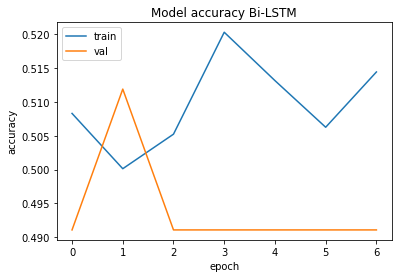

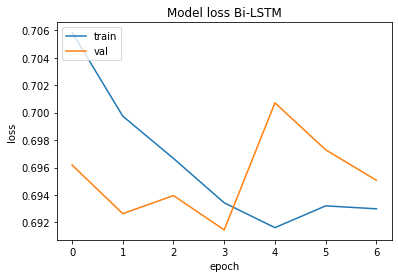

350/350 [==============================] - 52s 149ms/step - loss: 0.6939 - accuracy: 0.4849 - f1: 3.3613e-04
Test Loss: 0.693856418132782
Test Accuracy: 0.48488643765449524


In [ ]:
plot_score(history_bilstm, 'Bi-LSTM', image_path)
scores = model_bilstm_af.evaluate(texts_id_texts, labels,
                        batch_size=16)
print('Test Loss:', scores[0])
print('Test Accuracy:', scores[1])

In [ ]:
%%time
model_name = 'LSTM'
model_lstm = myLSTM(embeddingMatrix=embedding_mat,
          embed_size=embed_size,
          max_features=embedding_mat.shape[0], 
          maxlen=max_len)

history_lstm , model_lstm_af= train_model(model_lstm,model_name,texts_id_train, texts_id_test,texts_id_val, should_find_threshold = True)

Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.48810, saving model to LSTM_models.hdf5
245/245 - 53s - loss: 0.6930 - accuracy: 0.5139 - f1: 0.6137 - val_loss: 0.7041 - val_accuracy: 0.4881 - val_f1: 0.6504
Epoch 2/50

Epoch 00002: val_accuracy did not improve from 0.48810
245/245 - 52s - loss: 0.6932 - accuracy: 0.5203 - f1: 0.6761 - val_loss: 0.6945 - val_accuracy: 0.4881 - val_f1: 0.6504
Epoch 3/50

Epoch 00003: val_accuracy did not improve from 0.48810
245/245 - 52s - loss: 0.6927 - accuracy: 0.5139 - f1: 0.6612 - val_loss: 0.6947 - val_accuracy: 0.4881 - val_f1: 0.6504
Epoch 4/50

Epoch 00004: val_accuracy did not improve from 0.48810
245/245 - 52s - loss: 0.6926 - accuracy: 0.5185 - f1: 0.6444 - val_loss: 0.6950 - val_accuracy: 0.4881 - val_f1: 0.6504
Epoch 5/50

Epoch 00005: val_accuracy did not improve from 0.48810
245/245 - 52s - loss: 0.6925 - accuracy: 0.5185 - f1: 0.6699 - val_loss: 0.6958 - val_accuracy: 0.4881 - val_f1: 0.6504
Epoch 6/50

Epoch 00006: val_a

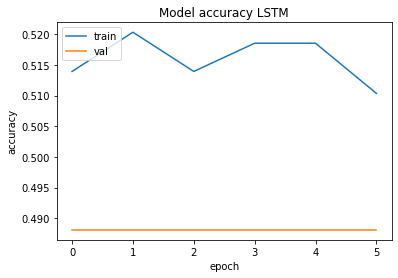

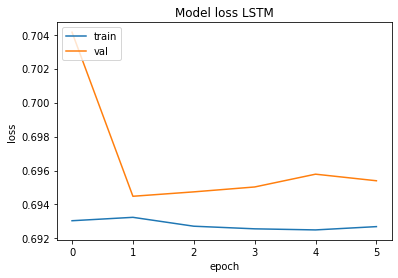

350/350 [==============================] - 30s 85ms/step - loss: 0.6972 - accuracy: 0.5153 - f1: 0.5146
Test Loss: 0.6971576809883118
Test Accuracy: 0.5152924060821533


In [ ]:
plot_score(history_lstm, 'LSTM', image_path)
scores = model_lstm_af.evaluate(texts_id_texts, labels,
                        batch_size=16)
print('Test Loss:', scores[0])
print('Test Accuracy:', scores[1])

##**CNN**

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      2710
           1       0.94      0.97      0.95      2881

    accuracy                           0.95      5591
   macro avg       0.95      0.95      0.95      5591
weighted avg       0.95      0.95      0.95      5591

[[2519  191]
 [  97 2784]]


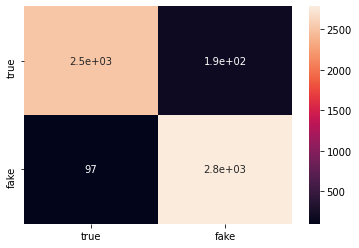

In [ ]:
from sklearn.metrics import precision_recall_fscore_support,classification_report
import seaborn as sns
y_pred=model_af.predict(texts_id_texts)
print('Classification report:\n',classification_report(labels,y_pred.round()))

matrix = confusion_matrix(labels,y_pred.round())
print(matrix)

df_cm = pd.DataFrame(matrix, columns=['true', 'fake'], index=['true', 'fake'])
sns.heatmap(df_cm, annot=True)

import pickle
with open('CNN_20.pickle','wb') as f:
    pickle.dump((labels,y_pred.round()),f)

##**bi-lstm**

Classification report:
               precision    recall  f1-score   support

           0       0.48      1.00      0.65      2710
           1       1.00      0.00      0.00      2881

    accuracy                           0.48      5591
   macro avg       0.74      0.50      0.33      5591
weighted avg       0.75      0.48      0.32      5591

[[2710    0]
 [2880    1]]


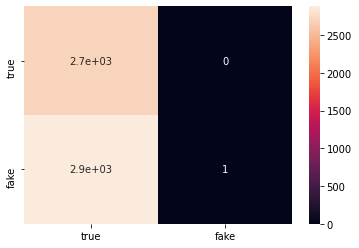

In [ ]:
y_pred_bilstm =model_bilstm_af.predict(texts_id_texts)
print('Classification report:\n',classification_report(labels,y_pred_bilstm.round()))

matrix_bilstm = confusion_matrix(labels,y_pred_bilstm.round())
print(matrix_bilstm)

df_cm_bilstm = pd.DataFrame(matrix_bilstm, columns=['true', 'fake'], index=['true', 'fake'])
sns.heatmap(df_cm_bilstm, annot=True)

import pickle
with open('bilstm.pickle','wb') as f:
    pickle.dump((labels,y_pred_bilstm.round()),f)

##**lstm**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2710
           1       0.52      1.00      0.68      2881

    accuracy                           0.52      5591
   macro avg       0.26      0.50      0.34      5591
weighted avg       0.27      0.52      0.35      5591

[[   0 2710]
 [   0 2881]]


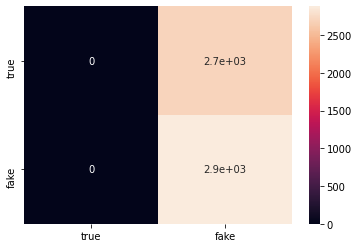

In [ ]:
from sklearn.metrics import precision_recall_fscore_support,classification_report
import seaborn as sns
y_pred_lstm =model_lstm_af.predict(texts_id_texts)
print('Classification report:\n',classification_report(labels,y_pred_lstm.round()))

matrix_lstm = confusion_matrix(labels,y_pred_lstm.round())
print(matrix_lstm)

df_cm_lstm = pd.DataFrame(matrix_lstm, columns=['true', 'fake'], index=['true', 'fake'])
sns.heatmap(df_cm_lstm, annot=True)

import pickle
with open('lstm.pickle','wb') as f:
    pickle.dump((labels,y_pred_lstm.round()),f)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()